# Practica 0: python

En esta practica implementaremos un algortimo de integracion numerica basado en el metodo de Monte Carlo.


Para ello necesitaremos de una funcion para la cual se calculara el area por debajo de la curva en base al metodo previamente mencionado.

# IMPORTS

In [34]:
import time
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(19680801)

In [2]:
#Funcion que usaremos durante toda la practica.
def f1(x):
    return -(x**(2)-2*x)

# Calculo de valores para el metodo monte carlo

Para implementar este algoritmo necesitaremos una serie de parametros para resolverlo:

    a -> Limite izq de la funcion
    b -> Limite der de la funcion
    M -> Punto mas alto de la funcion en el intervalo (a, b)

In [12]:
def NoLoopMaxY(func):
    funcMax = np.amax(func(s))
    return funcMax

NoLoopMaxY(f1)

0.9999999899979997

In [13]:
def LoopMaxY(func):
    max = 0
    
    for i in s:
        if (max < func(i)):
            max = func(i)
            
    return max

LoopMaxY(f1)

0.9999999899979997

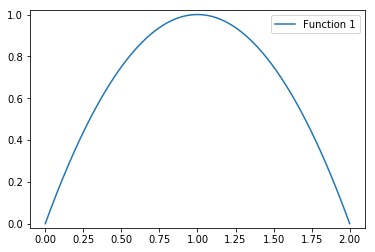

In [81]:
a = 0
b = 2
num_Puntos = 10000
s = np.linspace(a, b, 10000)
plt.ylim(-0.02, NoLoopMaxY(f1)+0.02)

plt.plot(s, f1(s))
plt.legend(['Function 1'])


Ahora calcularemos el punto mas alto de la funcion en ese intervalo.

Se usaran dos metodos diferentes uno con bucles y otro con las herramientas de las librerias, ya declarados mas arriba.

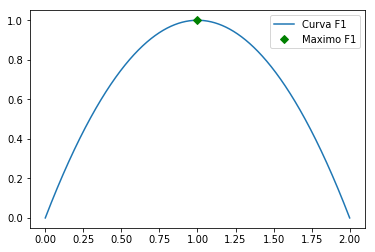

In [82]:
plt.plot(s, f1(s))

#Representamos el maximo Y de la funcion suponiendo que es simetrica
plt.plot((a+b)/2, NoLoopMaxY(f1), 'gD')

plt.legend(['Curva F1', 'Maximo F1'])

## Generacion y calculo de puntos aleatorios

A continuacion tendremos que generar un metodo que genere una cantidad n de puntos aleatorios en el intervalo de X(a, b) y en el intervalo de Y(0, MaxY(f1))

In [83]:
def puntos(maxY, a, b, n):
    X = np.random.uniform(a, b, n)
    Y = np.random.uniform(0, maxY, n)
    return (X, Y)

p = puntos(NoLoopMaxY(f1), a, b, num_Puntos)

Dibujamos los puntos:

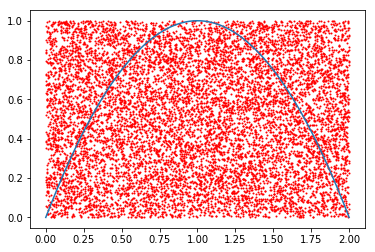

In [84]:
plt.plot(s, f1(s))

plt.scatter(p[0], p[1], 1, 'red')

Ahora necesitamos 2 metodos para medir que cantidad de puntos se han quedado por debajo de la curva de la funcion:

- Con Bucles:

In [85]:
def AreaLoop(fun, a, b, n):
    M = NoLoopMaxY(fun)
    
    NpDebajo = 0
    for i in range(n):
        if(p[1][i] < fun(p[0][i])):
            NpDebajo+=1
            
    res = (b-a)*M*(NpDebajo/n)
    #print(NpDebajo)
    return NpDebajo, res

AreaLoop(f1, a, b, num_Puntos)

(6631, 1.3261999867353471)

- Con librerias:

In [86]:
def AreaNoLoop(fun, a, b, n):
    p_Array = np.array(p)
    p_valid = (p_Array[1] < fun(p_Array[0])).sum()
    res = (b-a)*NoLoopMaxY(fun)*(p_valid/n)
    return p_valid, res

AreaNoLoop(f1, a, b, num_Puntos)

(6631, 1.3261999867353471)

## Conclusiones

A continuacion deberemos realizar el estudio de coomparacion de tiempo tiempos entre los diferentes metodos con y sin bucle.

In [97]:
tic = time.process_time()
AreaLoop(f1, a, b, num_Puntos)
toc = time.process_time()
time1 = 1000*(toc-tic)

tac = time.process_time()
AreaNoLoop(f1, a, b, num_Puntos)
tec = time.process_time()
time2 = 1000*(tec-tac)

print(time1)
print(time2)

15.625
0.0
